MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

This page shows the code to reproduce the figures in the manuscript in preparation. Results/figure selection is based on the analysis in the other scripts.  

In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import plotting
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot
from scipy.stats import chi2_contingency
from math import sqrt

# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/multiRat_rest_20220414.tsv'

df = pd.read_csv(df_path, sep='\t')
df = df.loc[(df['rat.ses'] == 1)]
df_exclude = df.loc[(df['exclude'] != 'yes')]

# color palette for all plots except voxelwise. 
sns.set_palette("colorblind")

## from https://stackoverflow.com/questions/50506076/is-there-an-efficient-way-to-store-2d-plots-as-a-vector-graphic-in-python
new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6
mm = (1/2.54)*10

# combine jet colormap for plot_stat_map (see https://stackoverflow.com/a/31052741)
# select to color scheme to use
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


In [2]:
print("number of rats in multirat " + str(len(df)))
print("QA passed in multirat " + str(len(df_exclude)))
df['rat.sex'].value_counts()

number of rats in multirat 646
QA passed in multirat 638


Male      505
Female    141
Name: rat.sex, dtype: int64

# Figure 1. Dataset description.
a. Sex.  
b. Strain.   
c. Anesthesia.   
d. Field strength.   
e. Breathing rate as a function of anesthesia.    
f. Repetition time as a function of sequence   
g. Echo time as a function of sequence.   
h. relative position of the slices
i. functional images examples
j. registration examples

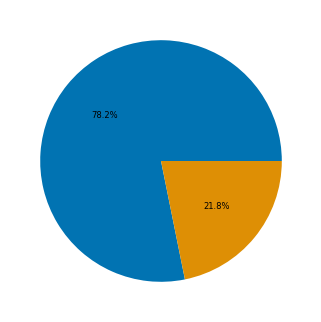

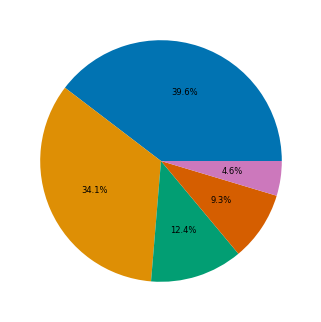

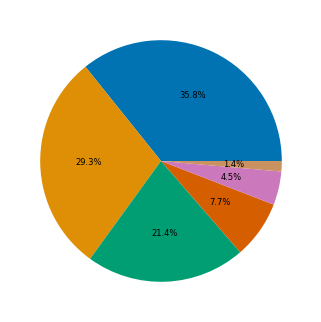

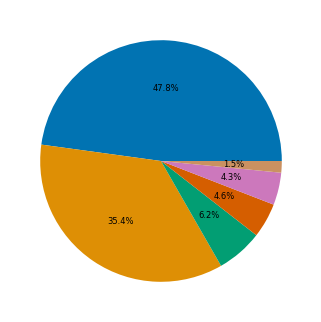

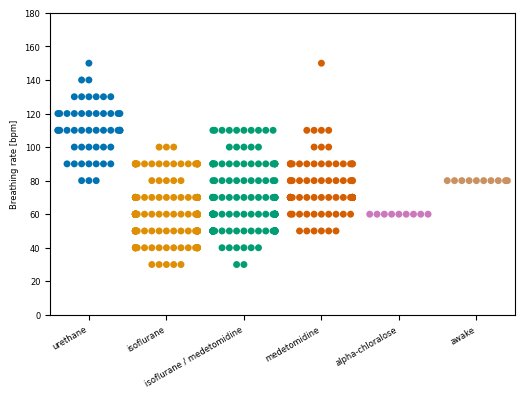

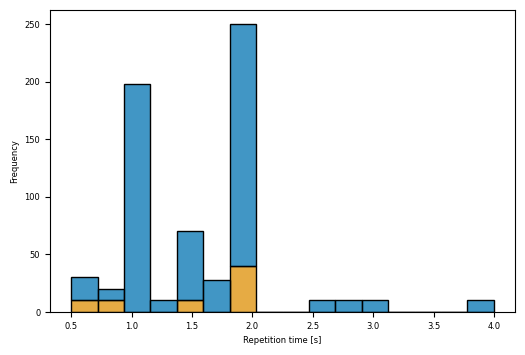

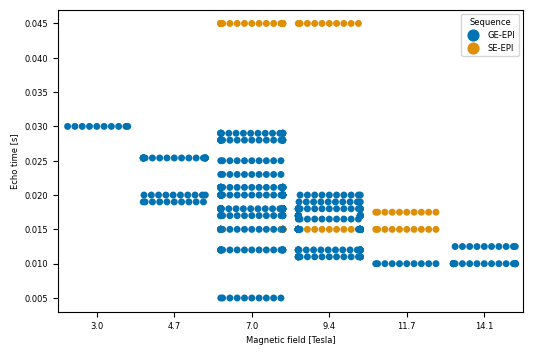

In [3]:
## Figure 1A
plt.pie(df['rat.sex'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1A.svg'), format="svg", dpi=600)
plt.show()

## Figure 1B
plt.pie(df['rat.strain'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1B.svg'), format="svg", dpi=600)
plt.show()

## Figure 1C
plt.pie(df['anesthesia.maintenance'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1C.svg'), format="svg", dpi=600)
plt.show()

## Figure 1D
plt.pie(df['MRI.field.strength'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1D.svg'), format="svg", dpi=600)
plt.show()

## Figure 1E
df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Breathing rate [bpm]")
snp.set(ylim=(0, 180))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1E.svg'), format="svg", dpi=600)
plt.show()

## Figure 1F
snp = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack")
snp.set_xlabel("Repetition time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().remove()
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1F.svg'), format="svg", dpi=600)
plt.show()

## Figure 1G
snp = sns.swarmplot(data=df, y="func.TE", hue="func.sequence", x='MRI.field.strength')
snp.set_xlabel("Magnetic field [Tesla]")
snp.set_ylabel("Echo time [s]")
snp.get_legend().set_title('Sequence')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1G.svg'), format="svg", dpi=600)
plt.show()


# Figure S1. Dataset description complement
a. Age in months   
b. Weight in g   


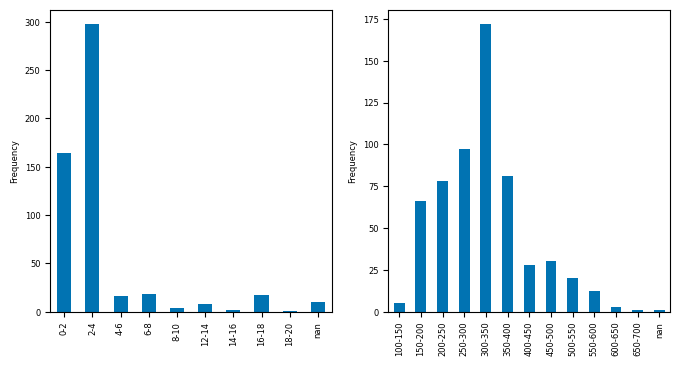

In [4]:
df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["100-150", 
                                                            "150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))



ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts',ax=axes[0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts',ax=axes[1])

ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS1.svg'), format="svg", dpi=600)
plt.show()

# Figure S2.  (failed) QA
a. Anatomical to template   
b. Functional to anatomical   
c. Failed Anatomical to template   
d. Failed Functional to anatomical  

#### Successful anatomical to template registration
![anat2temp_success](../assets/QC/anat2tempalte/sub-0101001_ses-1_T2w_autobox_inho_cor_registration.png)

#### Successful functional to anatomical registration
![func2ant_success](../assets/QC/epi2anat/sub-0101001_ses-1_run-1_bold_registration.png)


#### Failed anatomical to template registration

![func2anat](../assets/QC/sub-0104600_ses-1_T2w_inho_cor_registration.png)


#### Failed functional to anatomical registration

![func2anat](../assets/QC/sub-0101502_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104304_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104601_ses-1_run-1_bold_registration.png)

# Figure S3. tSNR
a. tSNR as a function of field strength   
b. tSNR as a function of repetition time   
c. tSNR as a function of echo time   
d. tSNR in the S1 and striatum   

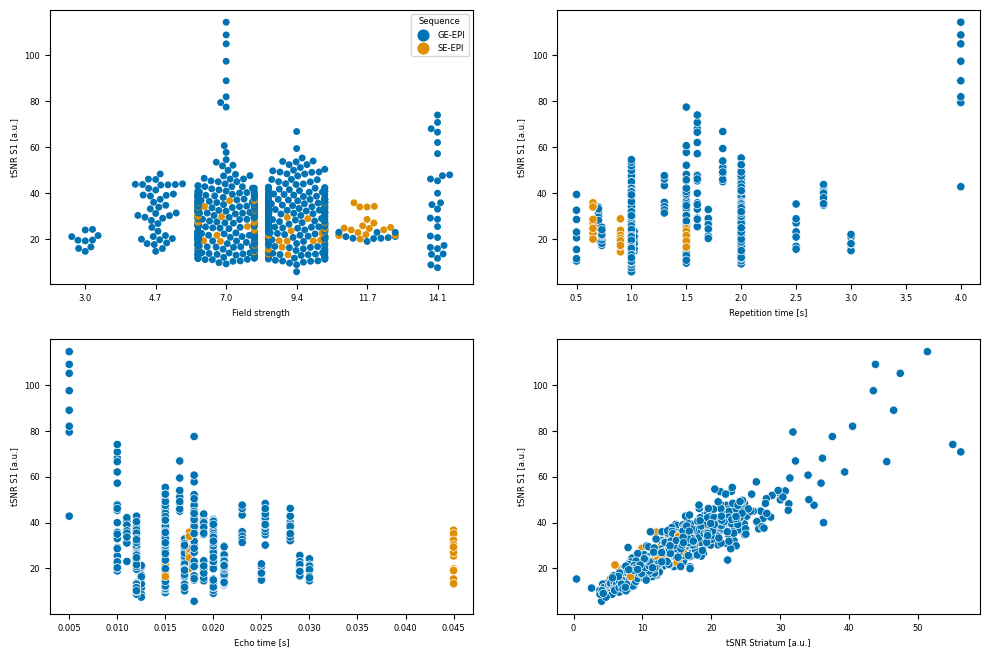

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,0])
ax2 = sns.scatterplot(data=df_exclude, x="func.TR",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="func.TE",
                    y="tsnr.S1", hue="func.sequence",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="tsnr.str",
                    y="tsnr.S1", hue="func.sequence",ax=axes[1,1])

ax1.set(xlabel='Field strength', ylabel='tSNR S1 [a.u.]')
ax1.get_legend().set_title('Sequence')

ax2.set(xlabel='Repetition time [s]', ylabel='tSNR S1 [a.u.]')
ax2.get_legend().remove()

ax3.set(xlabel='Echo time [s]', ylabel='tSNR S1 [a.u.]')
ax3.get_legend().remove()

ax4.set(xlabel='tSNR Striatum [a.u.]', ylabel='tSNR S1 [a.u.]')
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS3.svg'), format="svg", dpi=600)
plt.show()

# Figure S4 Motion
a. Mean framewise displacement as a function of strain   
b. Mean framewise displacement as a function of anesthesia   
c. Mean framewise displacement as a function of breathing rate   
d. Mean framewise displacement as a function of maximal framewise displacement   

correlation between mean and max FW
0.6445639298524825


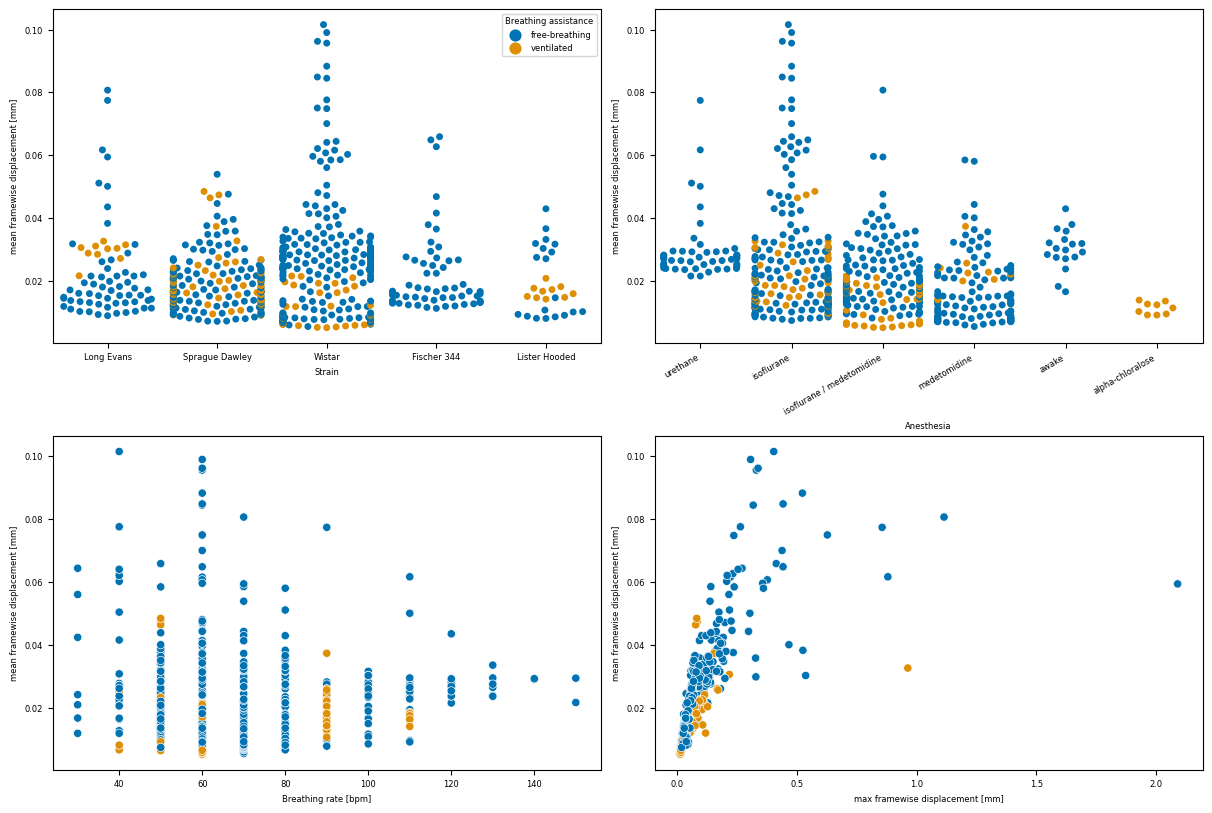

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8),constrained_layout=True)

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="rat.strain",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,0])
ax2 = sns.swarmplot(data=df_exclude, x="anesthesia.maintenance",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="anesthesia.breathing.rate",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="maxFW",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[1,1])


ax1.set(xlabel='Strain', ylabel='mean framewise displacement [mm]')
ax1.get_legend().set_title('Breathing assistance')

ax2.set(xlabel='Anesthesia', ylabel='mean framewise displacement [mm]')
ax2.get_legend().remove()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

ax3.set(xlabel='Breathing rate [bpm]', ylabel='mean framewise displacement [mm]')
ax3.get_legend().remove()

ax4.set(xlabel='max framewise displacement [mm]', ylabel='mean framewise displacement [mm]')
ax4.get_legend().remove()

print('correlation between mean and max FW')
print(df_exclude[['MFW','maxFW']].corr().iloc[0,1])

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS4.svg'), format="svg", dpi=600)
plt.show()

# Figure 2 Seed-based analysis
a. Diagram illustrating the logic behind FC specificity   
b. example time serie
c. FC specificity as a function of nuisance regression  
d. FC relative to specific and unspecific ROI
e.  example images
f. FC incidence map   
g. test-retest (skip?)   

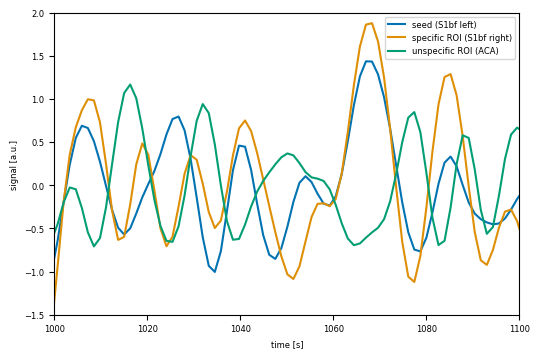

In [7]:
## Figure 2B

TR=1.3
seed = np.loadtxt('../assets/figure/S1bf_l_0104608.txt')
specific = np.loadtxt('../assets/figure/S1bf_r_0104608.txt')
unspecific = np.loadtxt('../assets/figure/ACA_l_0104608.txt')
time = np.arange(1, len(seed)*TR, TR)


plt.plot(time,seed,label='seed (S1bf left)')
plt.plot(time,specific,label='specific ROI (S1bf right)')
plt.plot(time,unspecific,label='unspecific ROI (ACA)')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('signal [a.u.]')
#plt.xlim(200,300) #not a keep
#plt.xlim(330,430) #not bad either
#plt.xlim(700,800) #not bad
plt.xlim(1000,1100)
plt.ylim(-1.5,2)
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2B.svg'), format="svg", dpi=600)
plt.show()

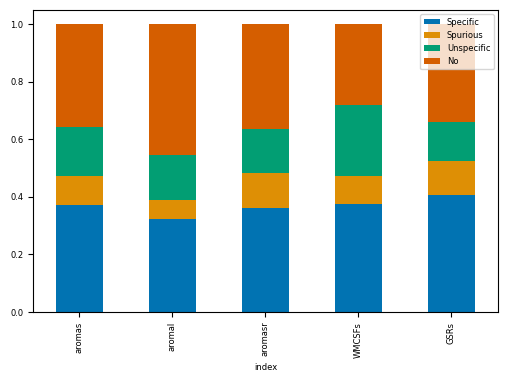

In [8]:
specificity_denoise= pd.concat([df_exclude['aromas_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromal_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),
                                df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),
                                df_exclude['GSRs_S1bf_cat'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"aromas_S1bf_cat": "aromas", "aromal_S1bf_cat": "aromal", "aromasr_S1bf_cat": "aromasr", "WMCSFs_S1bf_cat": "WMCSFs", "GSRs_S1bf_cat": "GSRs"})

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
specificity_denoise_T = specificity_denoise_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True)

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C.svg'), format="svg", dpi=600)
plt.show()

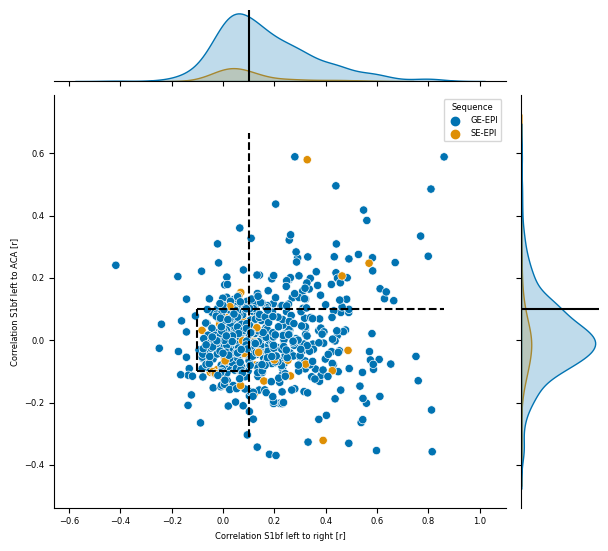

In [9]:
## Figure 2d
ax6 = sns.jointplot(data=df_exclude, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)


ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Correlation S1bf left to right [r]', ylabel='Correlation S1bf left to ACA [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2D_GSRs.svg'), format="svg", dpi=600)
plt.show()

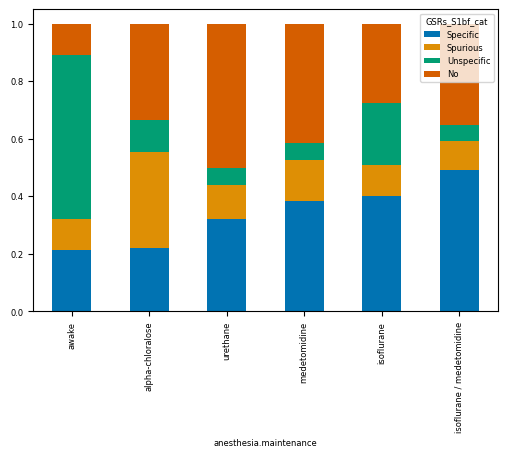

In [10]:
#Figure 2e

specificity_anesthesia=df_exclude.groupby(['anesthesia.maintenance', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
specificity_anesthesia=specificity_anesthesia.div(specificity_anesthesia.sum(axis=1), axis=0)
specificity_anesthesia=specificity_anesthesia.sort_values(by=['Specific'])

#specificity_anesthesia_T = specificity_anesthesia.T
#specificity_anesthesia_T.reset_index(level=0, inplace=True) 
#specificity_anesthesia_T = specificity_anesthesia_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_anesthesia = specificity_anesthesia[["Specific", "Spurious", "Unspecific","No"]]
specificity_anesthesia.plot(kind='bar', stacked=True)

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2E.svg'), format="svg", dpi=600)
plt.show()

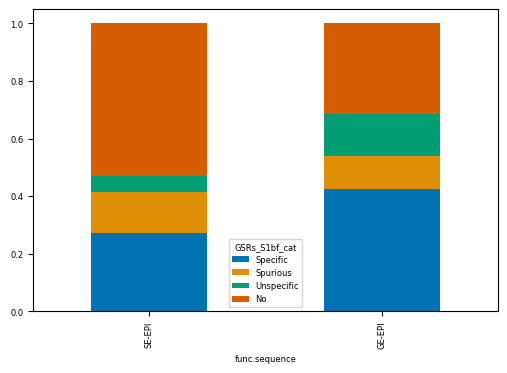

In [11]:
#Figure 2F

specificity_seq=df_exclude.groupby(['func.sequence', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
specificity_seq=specificity_seq.div(specificity_seq.sum(axis=1), axis=0)
specificity_seq=specificity_seq.sort_values(by=['Specific'])

#specificity_anesthesia_T = specificity_anesthesia.T
#specificity_anesthesia_T.reset_index(level=0, inplace=True) 
#specificity_anesthesia_T = specificity_anesthesia_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_seq = specificity_seq[["Specific", "Spurious", "Unspecific","No"]]
specificity_seq.plot(kind='bar', stacked=True)

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2F.svg'), format="svg", dpi=600)
plt.show()

In [12]:
## Figure 2g

bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')


seed_list = glob.glob((os.path.join(analysis_folder, 'export', 'seed','*'))+'/*')
#only keep WMCSFs seed maps
r = re.compile('/GSRs/')
seed_list_sub=list(filter(r.findall, seed_list))
# only keep S1bf seed maps
r = re.compile('S1bf')
seed_list_sub=list(filter(r.findall, seed_list_sub))

# keep specific example
r = re.compile('104608')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Specific FC, ID: 104608 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2G_specific.svg'))

# keep unspecific example
r = re.compile('102304')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Unspecific FC, ID: 102102 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2G_unspecific.svg'))

# keep no example
r = re.compile('104307')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='No FC, ID: 104307 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2G_no.svg'))

# keep Spurious example
r = re.compile('102506')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Spurious FC, ID: 102506 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2G_spurious.svg'))


In [13]:
bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

seed_group = ['S1bf','ACA', 'CPu','MOp']
y_stack = [0.14, 2.2, 1.6, 3.1]
output_incidence = os.path.join(analysis_folder, 'export', 'group_SBA_incidence')

seed_list = glob.glob(
    (os.path.join(analysis_folder, 'export', 'group_SBA'))+'/*')

for count,seed in enumerate(seed_group):

    r = re.compile(seed)
    seed_list_sub = list(filter(r.findall, seed_list))

    filename_export = "seed-"+seed+'.nii.gz'
    filename_path = os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    ma_img =  os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    plotting.plot_stat_map(ma_img,
              bg_img,
              title='Indicence map, seed: ' + seed + ', N = '+ str(len(seed_list_sub)),
              threshold=0.2,
             vmax=1,
              symmetric_cbar=False,
              cmap=mymap,
              black_bg=False,
              # display_mode="y",
              cut_coords=(0,  y_stack[count], 5),
              output_file=os.path.join(init_folder,'assets','figure','Figure2H_'+seed+'.svg'))

# Figure S5 DMN specificity

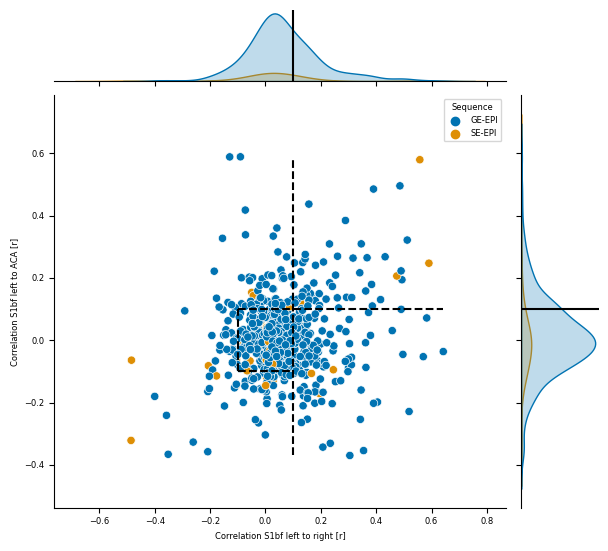

In [43]:
## Figure S5
ax6 = sns.jointplot(data=df_exclude, x='GSRs_ACA_MCA', y='GSRs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)


ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Correlation S1bf left to right [r]', ylabel='Correlation S1bf left to ACA [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_ACA_MCA']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS5.svg'), format="svg", dpi=600)
plt.show()

Identify AROMA false negative and true positives.
First, use assets/script/ICA_QA.py to manually identify components

In [12]:
ica_qa_dir='/project/4180000.19/multiRat/export/aromas_qa_test/'

false_neg_list = glob.glob(ica_qa_dir+'*false_neg.txt')  
true_neg_list = glob.glob(ica_qa_dir+'*true_neg.txt')  
unsure_neg_list = glob.glob(ica_qa_dir+'*unsure_neg.txt') 

tot_subject = len(false_neg_list)

false_neg = []
for i in false_neg_list:
    false_neg.extend(open(i,'r').read())
false_neg = [int(x) for x in false_neg]

true_neg = []
for i in true_neg_list:
    true_neg.extend(open(i,'r').read())
true_neg = [int(x) for x in true_neg]

unsure_neg = []
for i in unsure_neg_list:
    unsure_neg.extend(open(i,'r').read())
unsure_neg = [int(x) for x in unsure_neg]


print('percent signal component flagged as noise '+str(round(100*(sum(false_neg)/(tot_subject*10)),2)))
print('percent noise component flagged as noise '+str(round(100*(sum(true_neg)/(tot_subject*10)),2)))
print('percent unsure component flagged as noise '+str(round(100*(sum(unsure_neg)/(tot_subject*10)),2)))

percent signal component flagged as noise 4.17
percent noise component flagged as noise 77.77
percent unsure component flagged as noise 4.95


# Statistics: Chi2 for individual factors linked to FC specificity between S1bf-S1bf
In this analysis, I use Chi2 tests to determine if factors are distributed unequally with respect to the FC categories used above. 
Specifically, I seek to determine what factors are associated with greater specificity. I estimate `Phi` as the effect size parameter, using the phi = 0.1 threshold for small, 0.3 for medium and 0.5 for large effects respectively.  
See [https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize](https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize) for details.

Importantly, for continuous variables (e.g. mean framewise displacement), I resorted to bins to transform the data into categorical variables. For this, I (arbitrarily) used 6 bins. 

In [14]:
# now testing strain
chi_stack = df_exclude.groupby(['rat.strain', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sex
chi_stack = df_exclude.groupby(['rat.sex', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sex effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing age
chi_stack = df_exclude.groupby(['rat.age', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Age effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.maintenance
chi_stack = df_exclude.groupby(['anesthesia.maintenance', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Anesthesia effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.assistance
chi_stack = df_exclude.groupby(['anesthesia.breathing.assistance', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing assistance effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing field strength
chi_stack = df_exclude.groupby(['MRI.field.strength', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Field strength effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sequence
chi_stack = df_exclude.groupby(['func.sequence', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sequence effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.rate
df_exclude['breathing_bin']=pd.cut(df_exclude['anesthesia.breathing.rate'],6)
chi_stack = df_exclude.groupby(['breathing_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing rate effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.heart.rate. PLease note these have lots of NA
df_exclude['heart_bin']=pd.cut(df_exclude['anesthesia.heart.rate'],6)
chi_stack = df_exclude.groupby(['heart_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Heart rate effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing Mean framewise displacement
df_exclude['MFW_bin']=pd.cut(df_exclude['MFW'],6)
chi_stack = df_exclude.groupby(['MFW_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Mean framewise displacement effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing Max framewise displacement
df_exclude['maxFW_bin']=pd.cut(df_exclude['maxFW'],6)
chi_stack = df_exclude.groupby(['maxFW_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Max framewise displacement effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing tSNR in S1
df_exclude['tsnr_bin']=pd.cut(df_exclude['tsnr.S1'],6)
chi_stack = df_exclude.groupby(['tsnr_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('tSNR effect: g-value = '+str(round(g,2))+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


GSRs_S1bf_cat    No  Specific  Spurious  Unspecific  sum  Specific_percent
rat.strain                                                                
Lister Hooded     2        15         1          11   29              0.52
Sprague Dawley   47       111        22          35  215              0.52
Fischer 344      29        27         2           2   60              0.45
Long Evans       30        31        11           8   80              0.39
Wistar          108        76        39          31  254              0.30
Strain effect: g-value = 68.07 dof = 12 p-value = 7.330978355388302e-10 Phi = 0.231

GSRs_S1bf_cat   No  Specific  Spurious  Unspecific  sum  Specific_percent
rat.sex                                                                  
Male           138       218        60          82  498              0.44
Female          78        42        15           5  140              0.30
Sex effect: g-value = 43.89 dof = 3 p-value = 1.5926308852122815e-09 Phi = 0.185

GSRs_S1bf_c

# Manuscript, standardRat part. 
let's re-initialize everything in case I want to only make figures for standardRat

In [2]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import plotting, image
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, plot_prob_atlas, show
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.api import qqplot
from scipy.stats import chi2_contingency
from math import sqrt


# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/standardRat_20220408.tsv'

df = pd.read_csv(df_path, sep='\t')
df['Field_strength'] = pd.Categorical(df.Field_strength)
df_exclude = df.loc[(df['exclude'] != 'yes')]

# color palette for all plots except voxelwise. 
sns.set_palette("colorblind")

## from https://stackoverflow.com/questions/50506076/is-there-an-efficient-way-to-store-2d-plots-as-a-vector-graphic-in-python
new_rc_params = {'text.usetex': False,"svg.fonttype": 'none'}
plt.rcParams.update(new_rc_params)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6
mm = (1/2.54)*10

# combine jet colormap for plot_stat_map (see https://stackoverflow.com/a/31052741)
# select to color scheme to use
colors1 = plt.cm.viridis(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


In [16]:
print("number of rats in standardrat " + str(len(df)))
print("QA passed in standardrat " + str(len(df_exclude)))
print("Males in standardrat " + str(len(df.loc[(df['Sex'] == 'Male')])))
print("Females in standardrat " + str(len(df.loc[(df['Sex'] == 'Female')])))
print("Wistar in standardrat " + str(len(df.loc[(df['Strain'] == 'Wistar')])))

number of rats in standardrat 209
QA passed in standardrat 207
Males in standardrat 116
Females in standardrat 93
Wistar in standardrat 189


# Figure 3 Standard rat
a. Breathing rate
b. tSNR   
c. Mean framewise displacement   
d. FC specificity   
e. FC incidence   
d. ICA  

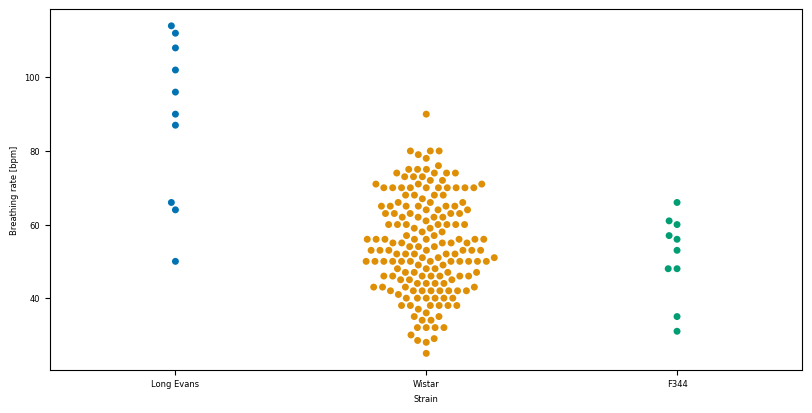

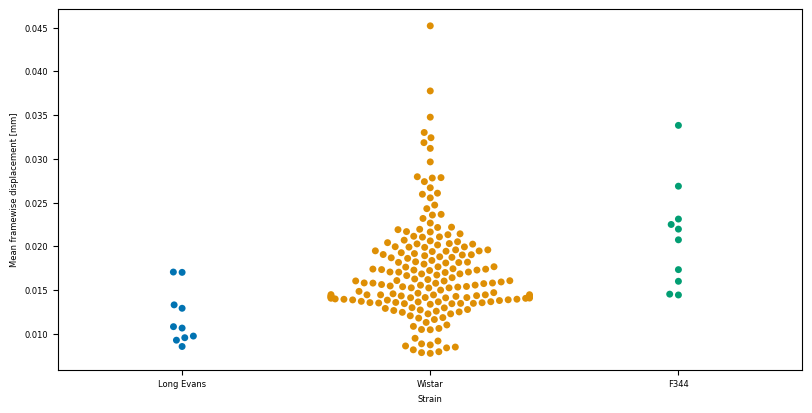

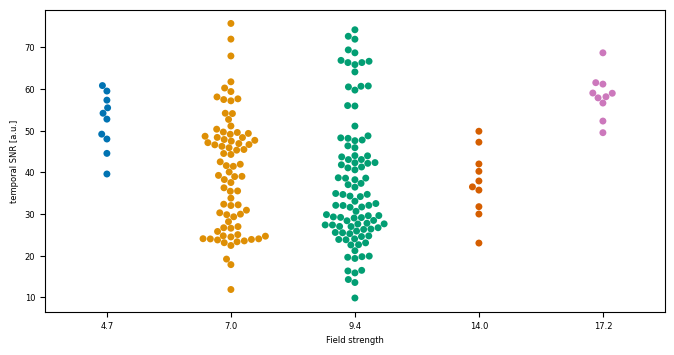

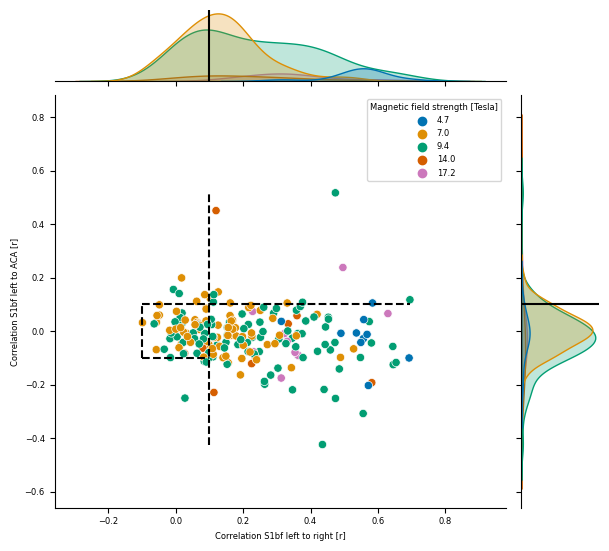

In [3]:

# plot breathing as a function of strain
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4),constrained_layout=True)
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Strain",
                    y="Breathing_onset")
ax1.set(xlabel='Strain', ylabel='Breathing rate [bpm]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure3A.svg'), format="svg", dpi=600)
plt.show()

# plot MFW as a function of strain
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4),constrained_layout=True)
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Strain",
                    y="MFW")
ax1.set(xlabel='Strain', ylabel='Mean framewise displacement [mm]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure3B.svg'), format="svg", dpi=600)
plt.show()

# plot S1 tSNR as a function of acquisition parameters

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 4))
sns.set_palette("colorblind")
ax1 = sns.swarmplot(data=df_exclude, x="Field_strength", y="tsnr.S1")
ax1.set(xlabel='Field strength', ylabel='temporal SNR [a.u.]')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure3C.svg'), format="svg", dpi=600)
plt.show()




ax6 = sns.jointplot(data=df_exclude, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='Field_strength')

ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Correlation S1bf left to right [r]', ylabel='Correlation S1bf left to ACA [r]')
ax6.ax_joint.get_legend().set_title('Magnetic field strength [Tesla]')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure3D.svg'), format="svg", dpi=600)
plt.show()



import os
from nilearn import plotting, image
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, plot_prob_atlas, show


bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

seed_group = ['S1bf','ACA', 'CPu','MOp']
y_stack = [0.14, 2.2, 1.6, 3.1]
output_incidence = os.path.join(analysis_folder, 'export_std', 'group_SBA_incidence')

seed_list = glob.glob(
    (os.path.join(analysis_folder, 'export_std', 'group_SBA'))+'/*')

for count,seed in enumerate(seed_group):

    r = re.compile(seed)
    seed_list_sub = list(filter(r.findall, seed_list))

    filename_export = "seed-"+seed+'.nii.gz'
    filename_path = os.path.join(output_incidence, filename_export)


    ma_img =  os.path.join( output_incidence, filename_export)


    plotting.plot_stat_map(ma_img,
              bg_img,
              title='Indicence map, seed: ' + seed + ', N = '+ str(len(seed_list_sub)),
              threshold=0.2,
             vmax=1,
              symmetric_cbar=False,
              cmap=mymap,
              black_bg=False,
              # display_mode="y",
              cut_coords=(0,  y_stack[count], 5),
              output_file=os.path.join(init_folder,'assets','figure','Figure3E_'+seed+'.svg'))


atlas_filename='../assets/nifti/canica_resting_state_clean.nii.gz'
bg_img = os.path.join(analysis_folder,
                      'template',
                      'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
                      'SIGMA_Rat_Anatomical_Imaging',
                      'SIGMA_Rat_Anatomical_InVivo_Template',
                      'SIGMA_InVivo_Brain_Template_Masked.nii')



# First plot the map for the PCC: index 4 in the atlas
display = plotting.plot_prob_atlas(atlas_filename, 
                                 bg_img=bg_img,
                                 colorbar=True,
                                 black_bg=False,
                                 display_mode='ortho',
                                 view_type='filled_contours',
                                 threshold="50%",
                                 title="ICA",
                                 output_file='../assets/figure/Figure3F.svg')

# Figure S6 StandardRat parameters. 
a. Sex    
b. Strain   
c. Field strength   
d. Weight   
e. Breathing vs mean framewise displacement   
f. specificity

correlation between MFW and breathing
-0.0968733837890261


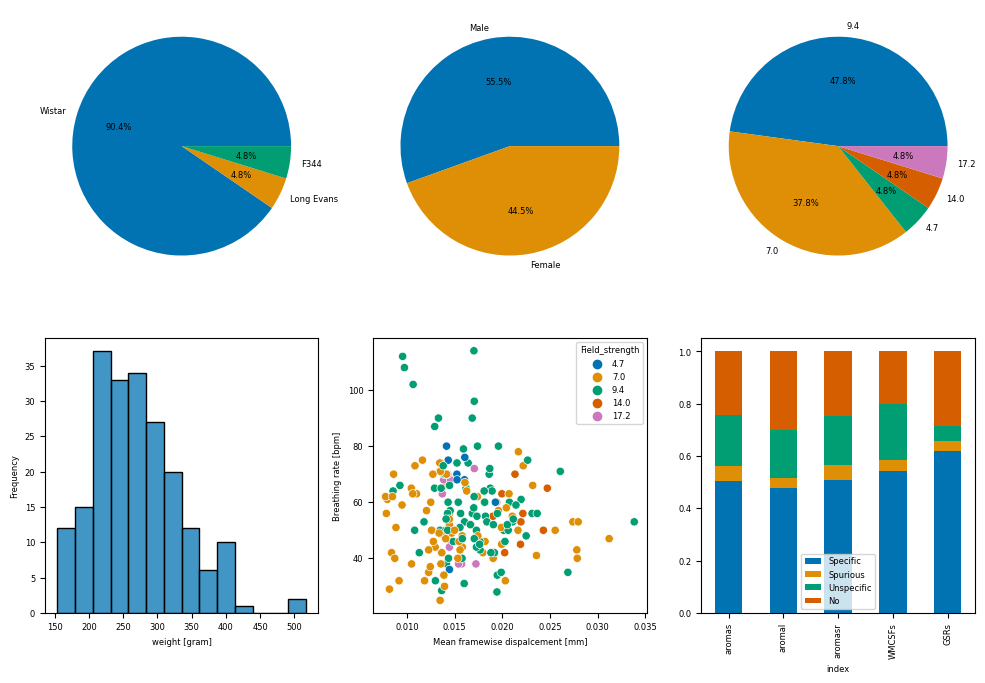

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))


ax1 = df['Sex'].value_counts().plot.pie(ax=axes[0,1],autopct="%.1f%%")
ax2 = df['Strain'].value_counts().plot.pie(ax=axes[0,0],autopct="%.1f%%")
ax3 = df['Field_strength'].value_counts().plot.pie(ax=axes[0,2], autopct="%.1f%%")
ax4 = sns.histplot(data=df, x="Weight",ax=axes[1,0])
ax5 = sns.scatterplot(data=df_exclude, x="MFW",
                    y="Breathing_onset", hue="Field_strength",ax=axes[1,1])


ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="")
ax3.set(xlabel="", ylabel="")
ax4.set(xlabel="weight [gram]", ylabel="Frequency")
ax5.set(xlabel='Mean framewise dispalcement [mm]', ylabel='Breathing rate [bpm]', title='')


print('correlation between MFW and breathing')
print(df_exclude[['MFW','Breathing_onset']].corr().iloc[0,1])

specificity_denoise= pd.concat([df_exclude['aromas_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromal_S1bf_cat'].value_counts(sort=False),
                                df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),
                                df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),
                                df_exclude['GSRs_S1bf_cat'].value_counts(sort=False)], axis=1)

specificity_denoise = specificity_denoise/specificity_denoise.sum()
specificity_denoise = specificity_denoise.rename(columns={"aromas_S1bf_cat": "aromas", "aromal_S1bf_cat": "aromal", "aromasr_S1bf_cat": "aromasr", "WMCSFs_S1bf_cat": "WMCSFs", "GSRs_S1bf_cat": "GSRs"})

specificity_denoise_T = specificity_denoise.T
specificity_denoise_T.reset_index(level=0, inplace=True) 
specificity_denoise_T = specificity_denoise_T[["index","Specific", "Spurious", "Unspecific","No"]]

specificity_denoise_T.set_index('index').plot(kind='bar', stacked=True,ax=axes[1,2])

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS6.svg'), format="svg", dpi=600)
plt.show()


# Stats for standardRat

In [19]:
# test for the group difference between strain on breathing rate
import pingouin as pg

df_exclude.anova(dv='Breathing_onset', between='Strain', detailed=False, effsize='n2')



,Source,ddof1,ddof2,F,p-unc,n2
0,Strain,2,195,31.165415,1.800620e-12,0.242221


In [20]:
# test for dependance between tSNR and field strength (linear reg)
import pingouin as pg


lm = pg.linear_regression(df_exclude['Field_strength'], df_exclude['tsnr.S1'])
lm.round(2)
#len(df_exclude['tsnr.S1'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,35.42,3.59,9.88,0.00,0.01,0.0,28.35,42.49
1,Field_strength,0.53,0.39,1.37,0.17,0.01,0.0,-0.23,1.30


In [21]:
#compare motion

#re-read the multirat table
df_path_multi='../assets/table/multiRat_rest_20220414.tsv'
df_multi = pd.read_csv(df_path_multi, sep='\t')
df_multi_exclude = df_multi.loc[(df_multi['exclude'] != 'yes')]

df_multi_exclude = df_multi_exclude.loc[(df_multi_exclude['anesthesia.maintenance']=='isoflurane / medetomidine')]


pg.ttest(df_exclude['MFW'],df_multi_exclude['MFW']).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.32,331.27,two-sided,0.02,"[-0.0, -0.0]",0.23,1.435,0.63


In [22]:
#re-read the multirat table
df_path_multi='../assets/table/multiRat_rest_20220414.tsv'
df_multi = pd.read_csv(df_path_multi, sep='\t')
df_multi_exclude = df_multi.loc[(df_multi['exclude'] != 'yes')]

chi_stack = pd.DataFrame([df_multi_exclude['GSRs_S1bf_cat'].value_counts(),df_exclude['GSRs_S1bf_cat'].value_counts()]).assign(dataset=['multirat','standardrat']).set_index('dataset')

g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

             Specific   No  Unspecific  Spurious  sum  Specific_percent
dataset                                                                
standardrat       128   59          12         8  207              0.62
multirat          311  243         105        83  742              0.42
Strain effect: g-value = 33.01161038539485 dof = 3 p-value = 3.20256210526179e-07 Phi = 0.132


In [24]:
df_path_multi='../assets/table/multiRat_rest_20220414.tsv'
df_multi = pd.read_csv(df_path_multi, sep='\t')
df_multi_exclude = df_multi.loc[(df_multi['exclude'] != 'yes')]

multirat_ds_select = df_multi_exclude['rat.ds'].isin([1001, 1002,1003, 1007, 1009, 
                                                    1011, 1010, 1012, 1015, 1016, 
                                                    1017, 1021, 1022, 1024, 1026, 
                                                    1028, 1029, 1030, 1031, 1032, 
                                                    1033, 1034, 1035, 1036, 1037, 
                                                    1038, 1039, 1040, 1041, 1042, 1044, 1052])

df_multi_exclude = df_multi_exclude.loc[multirat_ds_select]


stdrat_ds_select = df_exclude['DatasetID'].isin([3002, 3003, 3004, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 30016, 30019, 3020, 3021])

df_exclude_sub = df_exclude.loc[stdrat_ds_select]

chi_stack = pd.DataFrame([df_multi_exclude['GSRs_S1bf_cat'].value_counts(),df_exclude_sub['GSRs_S1bf_cat'].value_counts()]).assign(dataset=['multirat','standardrat']).set_index('dataset')

g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

             Specific   No  Unspecific  Spurious  sum  Specific_percent
dataset                                                                
standardrat        88   44           9         6  147              0.60
multirat          140  120          66        44  370              0.38
Strain effect: g-value = 28.369712950486832 dof = 3 p-value = 3.037617983849525e-06 Phi = 0.166


# Figure S7A StandardRat vs MultiRat specificity

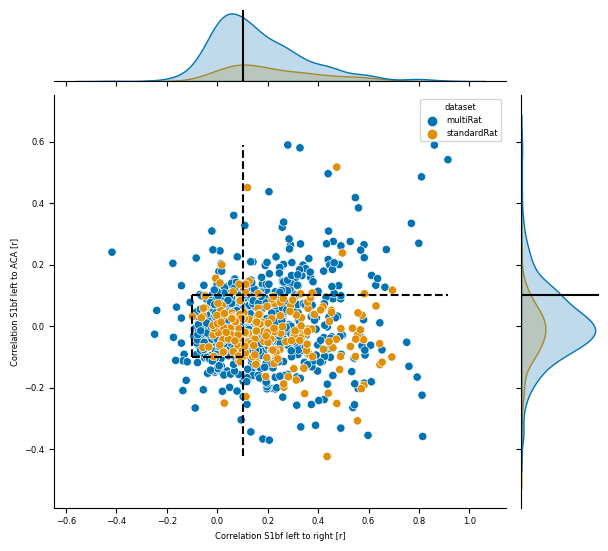

In [45]:
#Figure S7A

#re-read the multirat table
df_path_multi='../assets/table/multiRat_rest_20220414.tsv'
df_multi = pd.read_csv(df_path_multi, sep='\t')
df_multi_exclude = df_multi.loc[(df_multi['exclude'] != 'yes')]

df_multi_exclude=df_multi_exclude[['GSRs_S1bf_S1bf','GSRs_S1bf_ACA']]
df_multi_exclude['dataset'] = 'multiRat'

df_std_exclude = df_exclude[['GSRs_S1bf_S1bf','GSRs_S1bf_ACA']]
df_std_exclude['dataset'] = 'standardRat'

df_concat = pd.concat([df_multi_exclude, df_std_exclude])
df_concat = df_concat.reset_index()


sns.set_palette("colorblind")


ax6 = sns.jointplot(data=df_concat, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='dataset')

ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Correlation S1bf left to right [r]', ylabel='Correlation S1bf left to ACA [r]')
ax6.ax_joint.get_legend().set_title('dataset')
ax6.ax_joint.vlines(0.1,ymin=min(df_concat['GSRs_S1bf_ACA']),ymax=max(df_concat['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_concat['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')
plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS7A.svg'), format="svg", dpi=600)
plt.show()


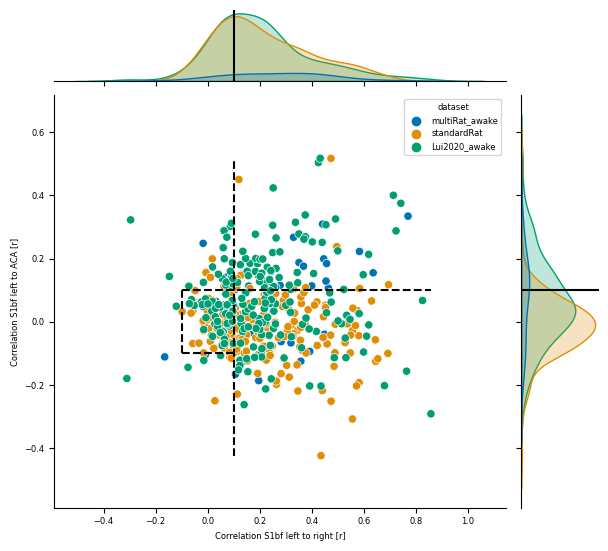

In [46]:
#Sup figure S7B

#re-read the multirat table
df_path_multi='../assets/table/multiRat_rest_20220414.tsv'
df_multi = pd.read_csv(df_path_multi, sep='\t')
df_multi_exclude = df_multi.loc[(df_multi['exclude'] != 'yes')]
df_multi_exclude = df_multi_exclude.loc[(df_multi_exclude['anesthesia.maintenance'] == 'awake')]

df_multi_exclude=df_multi_exclude[['GSRs_S1bf_S1bf','GSRs_S1bf_ACA']]
df_multi_exclude['dataset'] = 'multiRat_awake'

df_std_exclude = df_exclude[['GSRs_S1bf_S1bf','GSRs_S1bf_ACA']]
df_std_exclude['dataset'] = 'standardRat'

df_path_awake='../assets/table/awakeRatfull_20220819.tsv'
df_awake = pd.read_csv(df_path_awake, sep='\t')
df_awake_exclude = df_awake.loc[(df_awake['exclude'] != 'yes')]
df_awake_exclude=df_awake_exclude[['GSRs_S1bf_S1bf','GSRs_S1bf_ACA']]
df_awake_exclude['dataset'] = 'Lui2020_awake'

df_concat = pd.concat([df_multi_exclude, df_std_exclude,df_awake_exclude])
df_concat = df_concat.reset_index()


sns.set_palette("colorblind")


ax6 = sns.jointplot(data=df_concat, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='dataset')

ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Correlation S1bf left to right [r]', ylabel='Correlation S1bf left to ACA [r]')
ax6.ax_joint.get_legend().set_title('dataset')
ax6.ax_joint.vlines(0.1,ymin=min(df_concat['GSRs_S1bf_ACA']),ymax=max(df_concat['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_concat['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')
plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS7B.svg'), format="svg", dpi=600)
plt.show()


In [27]:
from scipy.stats import chi2_contingency
from math import sqrt

# now testing strain
chi_stack = df_exclude.groupby(['Strain', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Strain effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing sex
chi_stack = df_exclude.groupby(['Sex', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Sex effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing field strength
chi_stack = df_exclude.groupby(['Field_strength', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Field strength effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing anesthesia.breathing.rate
df_exclude['breathing_bin']=pd.cut(df_exclude['Breathing_onset'],6)
chi_stack = df_exclude.groupby(['breathing_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Breathing rate effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


# now testing Mean framewise displacement
df_exclude['MFW_bin']=pd.cut(df_exclude['MFW'],6)
chi_stack = df_exclude.groupby(['MFW_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Mean framewise displacement effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing Max framewise displacement
df_exclude['maxFW_bin']=pd.cut(df_exclude['maxFW'],6)
chi_stack = df_exclude.groupby(['maxFW_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('Max framewise displacement effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))

# now testing tSNR in S1
df_exclude['tsnr_bin']=pd.cut(df_exclude['tsnr.S1'],6)
chi_stack = df_exclude.groupby(['tsnr_bin', 
                    'GSRs_S1bf_cat']).size().unstack('GSRs_S1bf_cat')
chi_stack = chi_stack.loc[chi_stack.sum(axis=1) > 0]
chi_stack = chi_stack.fillna(0)
print('')
g, p, dof, expctd  = chi2_contingency(chi_stack)
chi_stack["sum"] = chi_stack.sum(axis=1)
chi_stack["Specific_percent"]= round(chi_stack['Specific']/chi_stack["sum"],2)
print(chi_stack.sort_values(by="Specific_percent",ascending=False))
print('tSNR effect: g-value = '+str(g)+' dof = '+str(dof)+' p-value = '+str(p) + ' Phi = '+ str(round(sqrt(g/chi_stack.sum().sum()),3)))


GSRs_S1bf_cat    No  Specific  Spurious  Unspecific    sum  Specific_percent
Strain                                                                      
Long Evans      0.0      10.0       0.0         0.0   10.0              1.00
Wistar         55.0     114.0       7.0        11.0  187.0              0.61
F344            4.0       4.0       1.0         1.0   10.0              0.40
Strain effect: g-value = 8.772222253693466 dof = 6 p-value = 0.18679916664207527 Phi = 0.145

GSRs_S1bf_cat  No  Specific  Spurious  Unspecific  sum  Specific_percent
Sex                                                                     
Male           28        75         4           7  114              0.66
Female         31        53         4           5   93              0.57
Sex effect: g-value = 2.158910332616328 dof = 3 p-value = 0.5400870330866645 Phi = 0.072

GSRs_S1bf_cat   No  Specific  Spurious  Unspecific  sum  Specific_percent
Field_strength                                                  

# Figure S8 Chi2 dot plot std
A. breathing rate    
B. tSNR   
C. maximal framewise displacement   

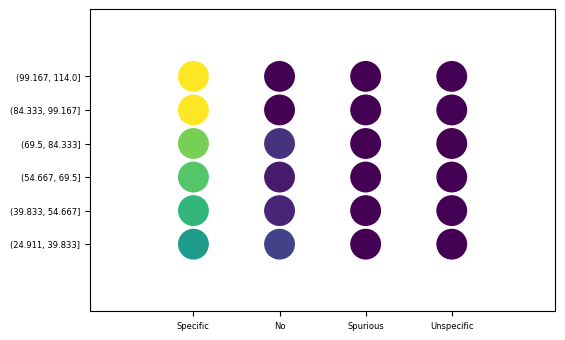

In [28]:
#adapted from https://stackoverflow.com/questions/50399802/python-categorical-bubble-plot and https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby
df_exclude['breathing_bin']=pd.cut(df_exclude['Breathing_onset'],6)
dfu = df_exclude.groupby(['breathing_bin', 
                    'GSRs_S1bf_cat']).size()
                    
size_fact=5

dfu_pcts = dfu.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).to_frame().reset_index().rename(columns={0: "percent",  'GSRs_S1bf_cat': "category"})
dfu_pcts['category']=pd.Categorical(dfu_pcts['category'], categories=["Specific", "No", "Spurious","Unspecific"], ordered=False)
dfu_pcts['breathing_bin'] = dfu_pcts['breathing_bin'].astype(str)
dfu_pcts['breathing_bin'] = pd.Categorical(dfu_pcts['breathing_bin'])

dfu_pcts= dfu_pcts.sort_values(by=['category','breathing_bin'])#, ascending=True)
dfu_pcts['percent'] *= size_fact

plt.scatter(x="category", y='breathing_bin',  s=450, c='percent', marker='o',vmin=25*size_fact,vmax=75*size_fact,data=dfu_pcts)
plt.margins(0.4)
plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS8A.svg'), format="svg", dpi=600)
plt.show()

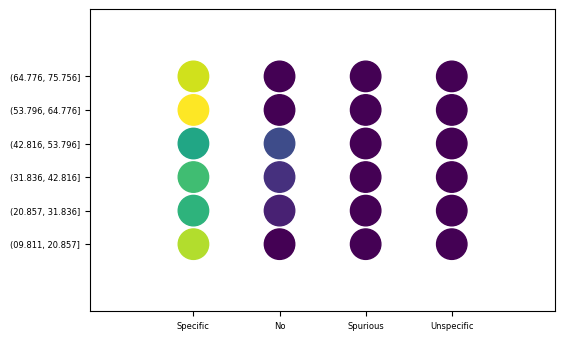

In [29]:
df_exclude['tsnr_bin']=pd.cut(df_exclude['tsnr.S1'],6)
dfu = df_exclude.groupby(['tsnr_bin', 
                    'GSRs_S1bf_cat']).size()

size_fact=5

dfu_pcts = dfu.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).to_frame().reset_index().rename(columns={0: "percent",  'GSRs_S1bf_cat': "category"})
dfu_pcts['category']=pd.Categorical(dfu_pcts['category'], categories=["Specific", "No", "Spurious","Unspecific"], ordered=False)
dfu_pcts['tsnr_bin'] = dfu_pcts['tsnr_bin'].astype(str)
dfu_pcts['tsnr_bin'] = pd.Categorical(dfu_pcts['tsnr_bin'])

dfu_pcts['tsnr_bin'] = dfu_pcts['tsnr_bin'].str.replace('9.811', '09.811')

dfu_pcts= dfu_pcts.sort_values(by=['category','tsnr_bin'])#, ascending=True)
dfu_pcts['percent'] *= size_fact

plt.scatter(x="category", y='tsnr_bin', s=480, c='percent', marker='o',vmin=25*size_fact,vmax=75*size_fact,data=dfu_pcts)
plt.margins(0.4)
plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS8B.svg'), format="svg", dpi=600)
plt.show()

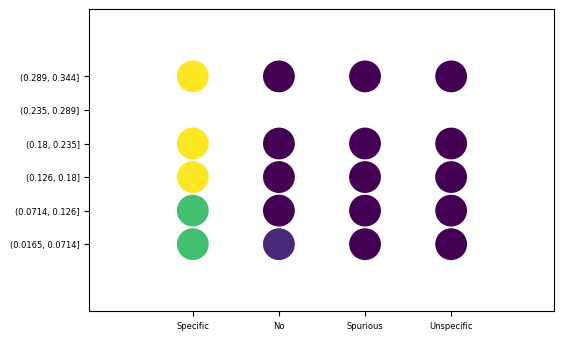

In [30]:
df_exclude['maxFW_bin']=pd.cut(df_exclude['maxFW'],6)
dfu = df_exclude.groupby(['maxFW_bin', 
                    'GSRs_S1bf_cat']).size()
                    
size_fact=5

dfu_pcts = dfu.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).to_frame().reset_index().rename(columns={0: "percent",  'GSRs_S1bf_cat': "category"})
dfu_pcts['category']=pd.Categorical(dfu_pcts['category'], categories=["Specific", "No", "Spurious","Unspecific"], ordered=False)
dfu_pcts['maxFW_bin'] = dfu_pcts['maxFW_bin'].astype(str)
dfu_pcts['maxFW_bin'] = pd.Categorical(dfu_pcts['maxFW_bin'])

dfu_pcts= dfu_pcts.sort_values(by=['category','maxFW_bin'], ascending=True)
dfu_pcts['percent'] *= size_fact

plt.scatter(x="category", y='maxFW_bin', s=480, c='percent', marker='o',vmin=25*size_fact,vmax=75*size_fact,data=dfu_pcts)
plt.margins(0.4)
plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS8C.svg'), format="svg", dpi=600)
plt.show()

The result above is about MFW dispalcement is biased due to the weak representation in all but one bin. I'm not including this in the latest results. -JG, 2022-04-14

#Figure S9 ICA detailed

Code to plot the ICA maps separately

In [31]:


plotting.show()


for i, cur_img in enumerate(iter_img(atlas_filename)):
    plot_stat_map(cur_img,bg_img, title="IC %d" % i,
                  black_bg=False,
                  display_mode='ortho', 
                  colorbar=True,
                  output_file='../assets/figure/Sup_FigureS9_IC'+str(i)+'.svg')

Finally, the estimation of connectivity specificity in the 7T HCP dataset is achieved through this (poorly documented) set of [instructions](../assets/script/sba_human.sh).
